<a href="https://colab.research.google.com/github/pe8sutd/DSL2025/blob/main/Verilog_HDL_Block_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Verilog HDL Block - SSD (Seven Segment Display)

## Seven Segment Display (SSD) for Basys-3


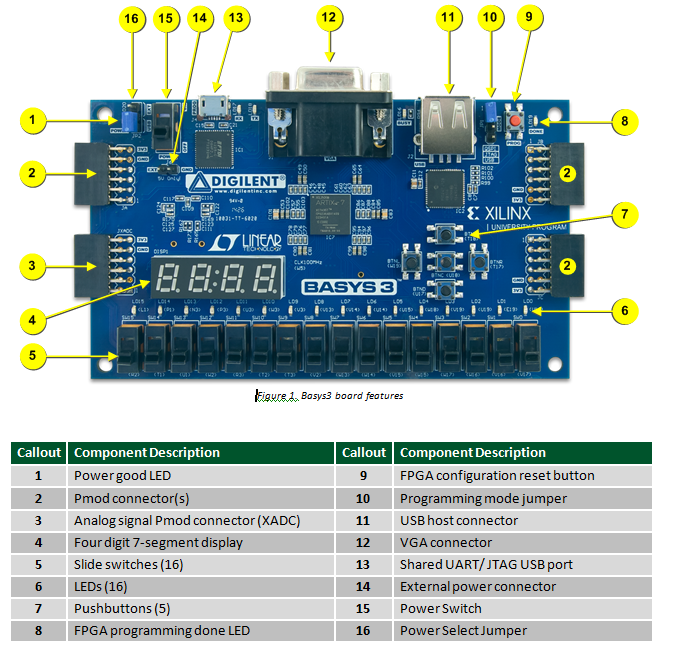

Figure 1: BASYS 3 board parts


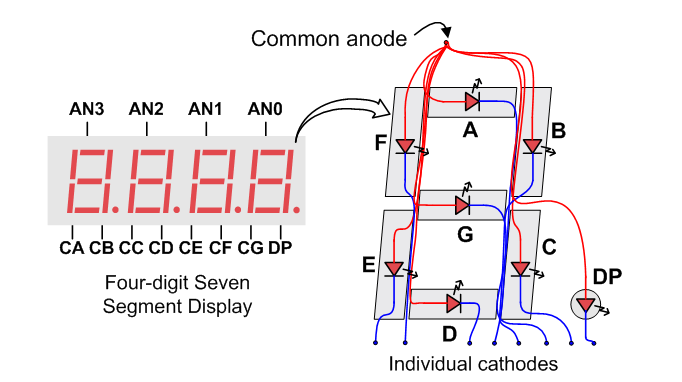

Figure 2: 7-segment LED display


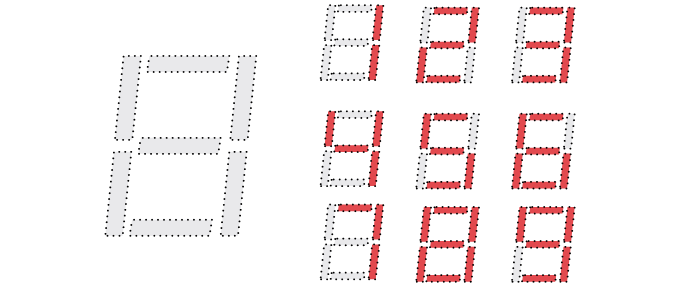

Figure 3: 7-segment LED display for decimal number from 1 to 9


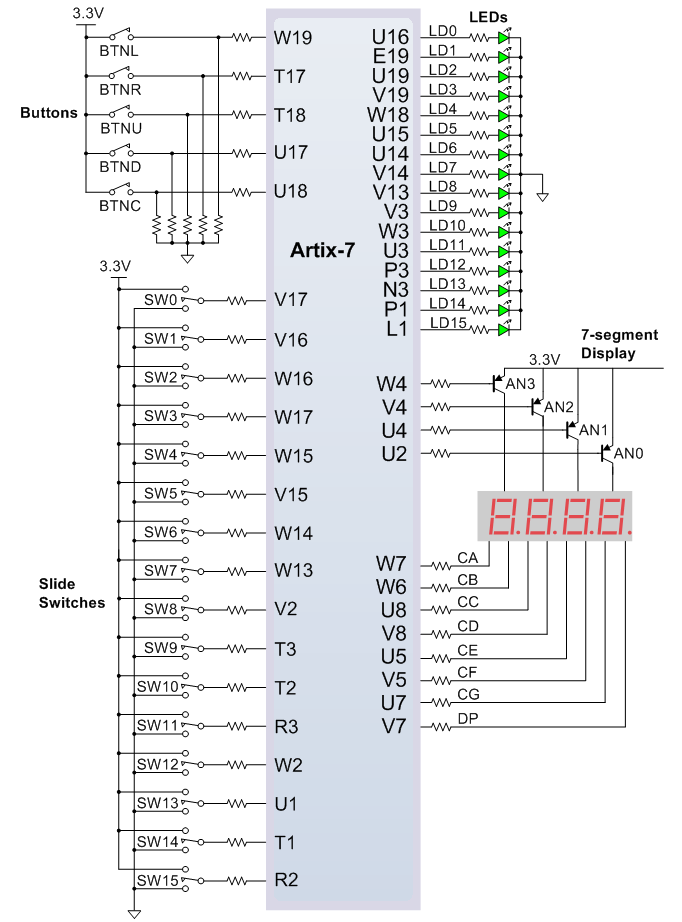

Figure 4: Basys 3 basic I/O

Table 1: Truth Table for Common Anode type BCD to Seven Segment Decoder, including DP

| x | x | x  | x  | x  | x  | x | x  |    | x  | x  | x  | x  | x  | x  | x | x      | CA to DP    | CA to DP | x | DP to CA    | DP to CA | x |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:------:|:-----------:|:--------:|:---:|:-----------:|:--------:|:---:|
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| d |   | d3 | d2 | d1 | d0 |   | CA | CB | CC | CD | CE | CF | CG | DP |   | Common | Cathode     | Cathode  |   | Cathode     | Cathode  | d |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   | Anode  | [7:0]       | [7:0]    |   | [7:0]       | [7:0]    |   |
| 0 |   | 0  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  |   | 1’b1   | 8’b00000011 | 8'h03    |   | 8’b11000000 | 8'hC0    | 0 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 1 |   | 0  | 0  | 0  | 1  |   | 1  | 0  | 0  | 1  | 1  | 1  | 1  | 1  |   | 1’b1   | 8’b10011111 | 8'h9F    |   | 8’b11111001 | 8'hF9    | 1 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 2 |   | 0  | 0  | 1  | 0  |   | 0  | 0  | 1  | 0  | 0  | 1  | 0  | 1  |   | 1’b1   | 8’b00100101 | 8'h25    |   | 8’b10100100 | 8'hA4    | 2 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 3 |   | 0  | 0  | 1  | 1  |   | 0  | 0  | 0  | 0  | 1  | 1  | 0  | 1  |   | 1’b1   | 8’b00001101 | 8'h0D    |   | 8’b10110000 | 8'hB0    | 3 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 4 |   | 0  | 1  | 0  | 0  |   | 1  | 0  | 0  | 1  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b10011001 | 8'h99    |   | 8’b10011001 | 8'h99    | 4 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 5 |   | 0  | 1  | 0  | 1  |   | 0  | 1  | 0  | 0  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b01001001 | 8'h49    |   | 8’b10010010 | 8'h92    | 5 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 6 |   | 0  | 1  | 1  | 0  |   | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 8’b01000001 | 8'h41    |   | 8’b10000010 | 8'h82    | 6 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 7 |   | 0  | 1  | 1  | 1  |   | 0  | 0  | 0  | 1  | 1  | 1  | 1  | 1  |   | 1’b1   | 8’b00011111 | 8'h1F    |   | 8’b11111000 | 8'hF8    | 7 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 8 |   | 1  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 8’b00000001 | 8'h01    |   | 8’b10000000 | 8'h80    | 8 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 9 |   | 1  | 0  | 0  | 1  |   | 0  | 0  | 0  | 0  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b00001001 | 8'h09    |   | 8’b10010000 | 8'h09    | 9 |





## Look-up Table using "case" statement

Using case statement, the Verilog code for this module can be implemented by directly mapping the Truth Table to the case statement. Take note to include a default statement.

In [ ]:

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r) begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'h11111000;    //NUM "7"
        4'b1000:segment_r <= 8'h10000000;    //NUM "8"
        4'b1001:segment_r <= 8'h10010000;    //NUM "9"
        default: segment_r <= 8'hff;
    endcase
end



SyntaxError: invalid decimal literal (<ipython-input-12-739f2350d3a0>, line 1)

The binary number is more often represented in hex.

In [ ]:


//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in hex
always @(cur_num_r)
begin
    case(cur_num_r)
        4'd0:segment_r <= 8'hc0;    //NUM "0"
        4'd1:segment_r <= 8'hf9;    //NUM "1"
        4'd2:segment_r <= 8'ha4;    //NUM "2"
        4'd3:segment_r <= 8'hb0;    //NUM "3"
        4'd4:segment_r <= 8'h99;    //NUM "4"
        4'd5:segment_r <= 8'h92;    //NUM "5"
        4'd6:segment_r <= 8'h82;    //NUM "6"
        4'd7:segment_r <= 8'hF8;    //NUM "7"
        4'd8:segment_r <= 8'h80;    //NUM "8"
        4'd9:segment_r <= 8'h90;    //NUM "9"
        default: segment_r <= 8'hff;
    endcase
end


SyntaxError: invalid decimal literal (<ipython-input-13-6066bd5c896b>, line 1)

The above core can be part of the module below.

In [ ]:
%%print_verilog

//
module b7a(segment_r,cur_num_r);
 output [7:0] segment_r;
 input [3:0] cur_num_r;

reg [7:0] segment_r;        //Register - Drive 7 Segment

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'hff;
    endcase
end

endmodule

In [ ]:
%%verilog

//
module b7a(segment_r,cur_num_r);
 output [7:0] segment_r;
 input [3:0] cur_num_r;

reg [7:0] segment_r;        //Register - Drive 7 Segment

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'hff;
    endcase
end

endmodule
////

//
module b7a_tb;
 wire [7:0] segment_r;
 reg [3:0] cur_num_r;

b7a b7a1(segment_r,cur_num_r);

initial begin
    $dumpfile("b7a.vcd");
    $dumpvars(0,b7a_tb);

    cur_num_r=4'd0;
    #1 cur_num_r=4'd1;
    #1 cur_num_r=4'd2;
    #1 cur_num_r=4'd3;
    #1 cur_num_r=4'd4;
    #1 cur_num_r=4'd5;
    #1 cur_num_r=4'd6;
    #1 cur_num_r=4'd7;
    #1 cur_num_r=4'd8;
    #1 cur_num_r=4'd9;
    #1 cur_num_r=4'd10;
    #1 cur_num_r=4'd11;
    #1 $finish;

    $dumpoff;
end

endmodule

////

In [ ]:
%%waveform b7a.vcd
sign_list = ['b7a_tb.b7a1.segment_r','b7a_tb.cur_num_r']
time_begin = 0
time_end = 11
base = 'hex' # bin, dec, dec2, hex, octal

Sometimes, the 7-Segment (CA to CG) and dp are not in the same case statement.

Table 2: Truth Table for Common Anode type BCD to Seven Segment Decoder, not including DP

| d |   | b3 | b2 | b1 | b0 |   | CA | CB | CC | CD | CE | CF | CG |   | Common | Cathode    | Cathode |   | Cathode    | Cathode |   |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:------:|:----------:|:-------:|:---:|:----------:|:-------:|:---:|
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   | Anode  | [6:0]      | [6:0]   |   | [6:0]      | [6:0]   |   |
| 0 |   | 0  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 7’b0000001 | 7'h01   |   | 7’b1000000 | 7'h40   | 0 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 1 |   | 0  | 0  | 0  | 1  |   | 1  | 0  | 0  | 1  | 1  | 1  | 1  |   | 1’b1   | 7’b1001111 | 7'h4F   |   | 7’b1111001 | 7'h79   | 1 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 2 |   | 0  | 0  | 1  | 0  |   | 0  | 0  | 1  | 0  | 0  | 1  | 0  |   | 1’b1   | 7’b0010010 | 7'h12   |   | 7’b0100100 | 7'h24   | 2 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 3 |   | 0  | 0  | 1  | 1  |   | 0  | 0  | 0  | 0  | 1  | 1  | 0  |   | 1’b1   | 7’b0000110 | 7'h06   |   | 7’b0110000 | 7'h30   | 3 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 4 |   | 0  | 1  | 0  | 0  |   | 1  | 0  | 0  | 1  | 1  | 0  | 0  |   | 1’b1   | 7’b1001100 | 7'h4C   |   | 7’b0011001 | 7'h19   | 4 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 5 |   | 0  | 1  | 0  | 1  |   | 0  | 1  | 0  | 0  | 1  | 0  | 0  |   | 1’b1   | 7’b0100100 | 7'h24   |   | 7’b0010010 | 7'h12   | 5 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 6 |   | 0  | 1  | 1  | 0  |   | 0  | 1  | 0  | 0  | 0  | 0  | 0  |   | 1’b1   | 7’b0100000 | 7'h20   |   | 7’b0000010 | 7'h02   | 6 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 7 |   | 0  | 1  | 1  | 1  |   | 0  | 0  | 0  | 1  | 1  | 1  | 1  |   | 1’b1   | 7’b0001111 | 7'h0F   |   | 7’b1111000 | 7'h78   | 7 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 8 |   | 1  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 0  |   | 1’b1   | 7’b0000000 | 7'h00   |   | 7’b0000000 | 7'h00   | 8 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 9 |   | 1  | 0  | 0  | 1  |   | 0  | 0  | 0  | 0  | 1  | 0  | 0  |   | 1’b1   | 7’b0000100 | 7'h04   |   | 7’b0010000 | 7'h10   | 9 |


The code below separates the dp and 7-segment led (CG - CA).  This allows the dp to be set separately.

In [ ]:
%%verilog

//
module b7b(dp,seg,cur_num_r);
 output dp;
 output [6:0] seg;
 input [3:0] cur_num_r;

 parameter dp_r = 1'b1;

//Drive 7Segment Display;
//There are 4 7Segment LED on the Basys 3 Board, which share segment driver;
//Hence, we have to turn on 4 7Segment LED in sequence;
reg [6:0] segment_r;
assign dp = dp_r;
assign seg[6:0] = segment_r[6:0];   //Connnect Register(7-Segment) to Segment Pin (seg[6:0])

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 7'b1000000;    //NUM "0"
        4'b0001:segment_r <= 7'b1111001;    //NUM "1"
        4'b0010:segment_r <= 7'b0100100;    //NUM "2"
        4'b0011:segment_r <= 7'b0110000;    //NUM "3"
        4'b0100:segment_r <= 7'b0011001;    //NUM "4"
        4'b0101:segment_r <= 7'b0010010;    //NUM "5"
        4'b0110:segment_r <= 7'b0000010;    //NUM "6"
        4'b0111:segment_r <= 7'b1111000;    //NUM "7"
        4'b1000:segment_r <= 7'b0000000;    //NUM "8"
        4'b1001:segment_r <= 7'b0010000;    //NUM "9"
        default:segment_r <= 7'hx;
    endcase
end

endmodule
////

//
module b7b_tb;
 wire dp;
 wire [6:0] seg;
 reg [3:0] cur_num_r;

defparam b7b1.dp_r=1'b0;

b7b b7b1(dp,seg,cur_num_r);

initial begin
    $dumpfile("b7b.vcd");
    $dumpvars(0,b7b_tb);

    cur_num_r=4'd0;
    #1 cur_num_r=4'd1;
    #1 cur_num_r=4'd2;
    #1 cur_num_r=4'd3;
    #1 cur_num_r=4'd4;
    #1 cur_num_r=4'd5;
    #1 cur_num_r=4'd6;
    #1 cur_num_r=4'd7;
    #1 cur_num_r=4'd8;
    #1 cur_num_r=4'd9;
    #1 cur_num_r=4'd10;
    #1 cur_num_r=4'd11;
    #1 $finish;

    $dumpoff;
end

endmodule

////


VCD info: dumpfile b7b.vcd opened for output.



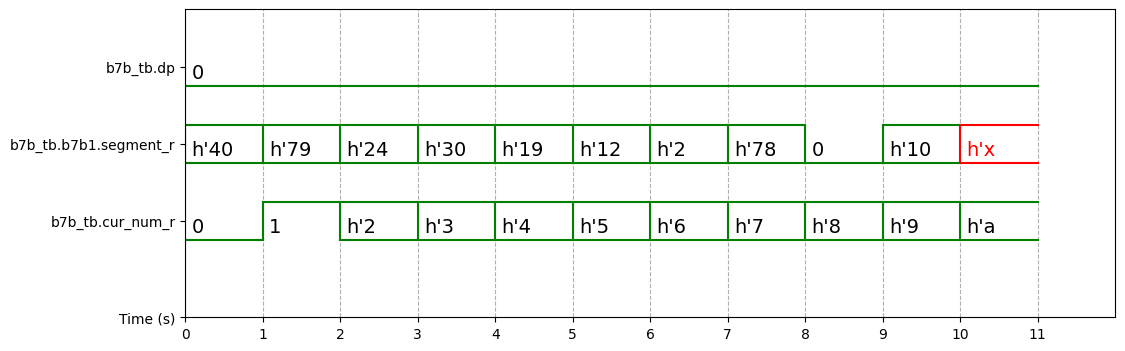

In [ ]:
%%waveform b7b.vcd
sign_list = ['b7b_tb.dp','b7b_tb.b7b1.segment_r','b7b_tb.cur_num_r']
time_begin = 0
time_end = 11
base = 'hex' # bin, dec, dec2, hex, octal

However, it would be better to completely take the dp out of the 7-segment display module, and do the dp assignment separately at a higher level.

In [ ]:
%%verilog

module b7c(seg,cur_num_r);
 output [6:0] seg;
 input [3:0] cur_num_r;

//Drive 7Segment Display;
//There are 4 7Segment LED on the Basys 3 Board, which share segment driver;
//Hence, we have to turn on 4 7Segment LED in sequence;
reg [6:0] segment_r;
assign seg[6:0] = segment_r[6:0];   //Connnect Register(7-Segment) to Segment Pin (seg[6:0])

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 7'b1000000;    //NUM "0"
        4'b0001:segment_r <= 7'b1111001;    //NUM "1"
        4'b0010:segment_r <= 7'b0100100;    //NUM "2"
        4'b0011:segment_r <= 7'b0110000;    //NUM "3"
        4'b0100:segment_r <= 7'b0011001;    //NUM "4"
        4'b0101:segment_r <= 7'b0010010;    //NUM "5"
        4'b0110:segment_r <= 7'b0000010;    //NUM "6"
        4'b0111:segment_r <= 7'b1111000;    //NUM "7"
        4'b1000:segment_r <= 7'b0000000;    //NUM "8"
        4'b1001:segment_r <= 7'b0010000;    //NUM "9"
        default:segment_r <= 7'hx;
    endcase
end

endmodule
////

//
module b7c_tb;
 wire [6:0] seg;
 reg [3:0] cur_num_r;

b7c b7c1(seg,cur_num_r);

initial begin
    $dumpfile("b7c.vcd");
    $dumpvars(0,b7c_tb);

    cur_num_r=4'd0;
    #1 cur_num_r=4'd1;
    #1 cur_num_r=4'd2;
    #1 cur_num_r=4'd3;
    #1 cur_num_r=4'd4;
    #1 cur_num_r=4'd5;
    #1 cur_num_r=4'd6;
    #1 cur_num_r=4'd7;
    #1 cur_num_r=4'd8;
    #1 cur_num_r=4'd9;
    #1 cur_num_r=4'd10;
    #1 cur_num_r=4'd11;
    #1 $finish;
end

endmodule
////



VCD info: dumpfile b7c.vcd opened for output.



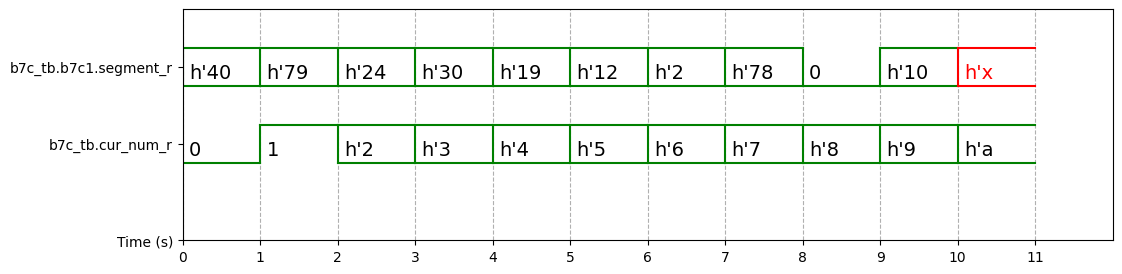

In [ ]:
%%waveform b7c.vcd
sign_list = ['b7c_tb.b7c1.segment_r','b7c_tb.cur_num_r']
time_begin = 0
time_end = 11
base = 'hex' # bin, dec, dec2, hex, octal

## 4 SSD

Basys3 board has 4 7-segment displays (LED3, LED2, LED1, LED0), that can be turned on through AN[3:0].


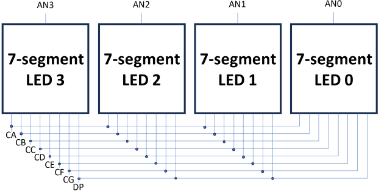

Figure 5: 4-digit 7-segment LED display connectivity

## Time multiplexing

The cathodes (CA ... DP) of four seven-segment LEDs on Basys 3 are connected together as shown in Figure 5. The reason is the FPGA chip has limited pin out, or it is a way of saving pin count.
Thus, to display 4 different numbers on the 4-digit seven-segment LED display, the cathodes (CA-CG) of the four seven-segment LEDs have to be controlled separately by activating the four seven-segment LEDs at different times (Time Multiplexing).
For example, when LED-1 is activated by driving AN1 high and the other three LEDs (LED-0, LED-2, LED-3) are deactivated (AN0, AN2, and AN3 not driven), the cathode pattern (CA-CG) will be used for displaying numbers on LED-1.
Similarly, LED-0 - LED-3 can be displayed by using the same way at different times.

As shwon in Figure 6, four seven-segment LEDs can be activated by using 4 PNP transistors AN0-AN3. When a transistor is on or the Base terminal (W4, U4, V4, or U2) is low, the corresponding anode is driven high (3.3 V) to activate or enable the corresponding seven-segment LED.
When a LED is deactivated after illuminating, it will darken. To avoid the displaying discontinuity perceived by the human eye, the four seven-segment LEDs should be continuously refreshed at 60 Hz or above (but not too high, usually at 1 kHz), e.g. it should be refreshed at every 1 ms to 16 ms (60 Hz) to 1 ms (1 kHz).


In [6]:

print("For 60 Hz, t = ", 1/60*1000, "ms")
print("For 1 kHz, t = ", 1/1000*1000, "ms")


For 60 Hz, t =  16.666666666666668 ms
For 1 kHz, t =  1.0 ms



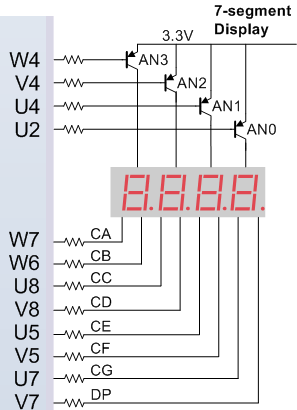

Figure 6: SSD driving circuit

Verilog that related to SSD, extracted from Stopwatch code.

The multiplexing frequency is 500 Hz (60 Hz to 1 kHz), almost 10 times of 50 Hz / 60 Hz, which is fast enough for eyes to detect the multiplexing sequence.
```
case(an_r)
        4'b0001: an_r <= 4'b0010;   //DISPLAY ON DIG3
        4'b0010: an_r <= 4'b0100;   //DISPLAY ON DIG2
        4'b0100: an_r <= 4'b1000;   //DISPLAY ON DIG1
        4'b1000: an_r <= 4'b0001;   //DISPLAY ON DIG4
        default: an_r <= 4'b0001;   //DISPLAY ON DIG4
endcase
```

The multiplexing is achieved through "case" statement in synchronous loop that is triggered at 500 Hz clock positive edge.
```
always @(negedge rstn or posedge clk_500hz_r)
```


Part of the codes are shown below.

In [ ]:

reg [3:0] an_r;                     //Register - Drive Common Anode;
                                    //AN3, AN2, AN1, AN0
assign an = ~an_r;                  //Connnect Register(Anode) to Anode Pins with NOT Gate;
                                    //If 7Segment is Common Cathod, connect Pins without NOT Gate

////////////////////////////////////////////////////////////////////////////////////////
//DIG4 (LED-0); DIG3 (LED-1); DIG2 (LED-2); DIG1 (LED-3);
//Drive 7Segment Anode;
//When an_r == 0001, DIG4 will turn on;
//When an_r == 0001, at posedge clk_500hz_r, an_r will be set to 0010(DIG3 ON);
//When an_r == 0010, at posedge clk_500hz_r, an_r will be set to 0100(DIG2 ON);
//....
//DIG4 -> DIG3 -> DIG2 -> DIG1 -> DIG4 -> DIG3 -> DIG2 -> ...;
always @(negedge rstn or posedge clk_500hz_r)begin
    if(!rstn)begin
        an_r <= 4'b0000;    //When system reset, empty all display;
    end
    else begin
        case(an_r)
        4'b0001: an_r <= 4'b0010;   //DISPLAY ON DIG3
        4'b0010: an_r <= 4'b0100;   //DISPLAY ON DIG2
        4'b0100: an_r <= 4'b1000;   //DISPLAY ON DIG1
        4'b1000: an_r <= 4'b0001;   //DISPLAY ON DIG4
        default: an_r <= 4'b0001;   //DISPLAY ON DIG4
        endcase
    end
end
////////////////////////////////////////////////////////////////////////////////////////


# Basys3 Stopwatch Verilog Code for Reference

In [ ]:
%%verilog

////////////////////////////////////////////////////////////////////////////////////////
module countXCs1
    #(  parameter PERIOD_X = 17'd100_000)
    (   output reg countX,
        output reg [$clog2(PERIOD_X)-1:0] count,
        input main_clock,   //clock source
        input rstn          //rstn - RESET System
    );

 always @ (posedge main_clock or negedge rstn)
  begin
   if (rstn == 1'b0)
    begin
     countX <= 1'b0; count <= 0;
    end
   else
   //**********************
    begin
     if (count == (PERIOD_X - 1'b1))
      begin
       countX <= 1'b1; count <= 0;
      end
     else
      begin
       countX <= 1'b0; count <= count + 1'b1;
      end
    end
   //**********************
  end

endmodule
////////////////////////////////////////////////////////////////////////////////////////

////////////////////////////////////////////////////////////////////////////////////////
module swC1_clk
    #(parameter PERIOD_X = 17'd100_000)     //number of count
    (
    output clk_ro,                          //Output clock
    output countX,                          //
    output [$clog2(PERIOD_X)-1:0] count,    //
    input main_clock,                       //
    input rstn                              //BTNR - RESET System
    );

reg clk_r;
assign clk_ro = clk_r;
wire clk_p;
assign countX = clk_p;

countXCs1 countXCs11(.countX(clk_p),.count(count),.main_clock(main_clock),.rstn(rstn));

always@(posedge clk_p or negedge rstn)
    if (!rstn) clk_r <= 1'b0;
    else clk_r <= ~clk_r;   //Toggle clk reg;

endmodule
////////////////////////////////////////////////////////////////////////////////////////

// Top Module /////////////////////////////////////////////////////////////////////////
`timescale 1ns / 1ns
`define x500 17'd100_000
`define x1 8'd250

module swC1
    #(  parameter PERIOD_X_500Hz = `x500,   //17'd100_000;
        parameter PERIOD_X_1Hz = `x1        // 8'd250;
    )
    (   input clk,          //100MHz Clock Source; 10ns, 500Hz=2ms, 1Hz=1s
        input btnR,         //BTNR - RESET System;
        output [6:0] seg,   //7-Segment - Segment[6:0];
        output dp,          //7-Segment - Segment-DP;
        output [3:0] an     //7-Segment - Common Anode;
    );

//Set BTNR Button as Reset Function;
wire rstn;
assign rstn=~btnR;

////////////////////////////////////////////////////////////////////////////////////////
defparam swC1_clk_500Hz.countXCs11.PERIOD_X = `x500; //17'd100_000; //100Mhz/(500Hz*2) =  100_000(17 bits);
defparam swC1_clk_1Hz.countXCs11.PERIOD_X = `x1;     //8'd250; //500Hz/(1Hz*2) = 250 (8 bits)

//In this application, 2 clock, 1Hz (1 second count) and 500Hz (7Segment);
wire clk_500hz_r, clk_500hz_p;
wire clk_1hz_r, clk_1hz_p;
wire [$clog2(PERIOD_X_500Hz)-1:0] cnter_500hz_r;    // 100Mhz/(500Hz*2) =  100_000(17 bits);
wire [$clog2(PERIOD_X_1Hz)-1:0] cnter_1hz_r;        // 500Hz/(1Hz*2) = 250 (8 bits)

//Create 500Hz Clock from 100MHz Clock Source;
swC1_clk #(.PERIOD_X(`x500)) swC1_clk_500Hz(.clk_ro(clk_500hz_r),.countX(clk_500hz_p),.count(cnter_500hz_r),.main_clock(clk),.rstn(rstn));
//Create 1Hz Clock from 500Hz Clock Source;
swC1_clk #(.PERIOD_X(`x1)) swC1_clk_1Hz(.clk_ro(clk_1hz_r),.countX(clk_1hz_p),.count(cnter_1hz_r),.main_clock(clk_500hz_r),.rstn(rstn));
////////////////////////////////////////////////////////////////////////////////////////

////////////////////////////////////////////////////////////////////////////////////////
// Timer Section is composed with 4 BCD Number counter(Minute Decade,Minute Unit, Second Decade, Minute Unit);
wire [2:0] sec_deca_bcd_r,min_deca_bcd_r; //Register - (Minute Decade,Minute Unit, Second Decade, Second Unit);
wire [3:0] sec_unit_bcd_r,min_unit_bcd_r;
wire sec_unit_cout,sec_deca_cout,min_unit_cout,min_deca_cout; //Carry Out Signal, When 4 BCD Number counter reach upper limit, it will generate a cout signal;

//Counter           Upper Limit
//Minute Decade     5
//Minute Unit       9
//Second Decade     5
//Second Unit       9
countXCs1 #(.PERIOD_X(3'd6 )) countXCs_md(.countX(min_deca_cout),.count(min_deca_bcd_r),.main_clock(min_unit_cout),.rstn(rstn));
countXCs1 #(.PERIOD_X(4'd10)) countXCs_mu(.countX(min_unit_cout),.count(min_unit_bcd_r),.main_clock(sec_deca_cout),.rstn(rstn));
countXCs1 #(.PERIOD_X(3'd6 )) countXCs_sd(.countX(sec_deca_cout),.count(sec_deca_bcd_r),.main_clock(sec_unit_cout),.rstn(rstn));
countXCs1 #(.PERIOD_X(4'd10)) countXCs_su(.countX(sec_unit_cout),.count(sec_unit_bcd_r),.main_clock(clk_1hz_r    ),.rstn(rstn));
////////////////////////////////////////////////////////////////////////////////////////

////////////////////////////////////////////////////////////////////////////////////////
//Drive 7Segment Display;
//There are 4 7Segment LED on the Basys 3 Board, which share segment driver;
//Hence, we have to turn on 4 7Segment LED in sequence;
reg [3:0] dp_r=4'b1011;             //
wire [6:0] segment_r;               //Register - Drive 7 Segment
assign seg[6:0] = segment_r[6:0];   //Connnect Register(7-Segment) to Segment Pin (seg[6:0])
wire [3:0] cur_num_r;               //Register - BCD Number Display at this moment;
wire [15:0] bcd_num;                //Wire - 4 BCD Number;
reg [3:0] an_r;                     //Register - Drive Common Anode;
assign an = ~an_r;                  //Connnect Register(Anode) to Anode Pins with NOT Gate;
                                    //If 7Segment is Common Cathod, connect Pins without NOT Gate

//When DIG4 on, BCD Number Display at this moment is bcd_num[3:0];  (i.e Stop Watch - Second Unit)
//When DIG3 on, BCD Number Display at this moment is bcd_num[7:4];  (i.e Stop Watch - Second Decade)
//When DIG2 on, BCD Number Display at this moment is bcd_num[11:8]; (i.e Stop Watch - Minute Unit)
//When DIG1 on, BCD Number Display at this moment is bcd_num[15:12];(i.e Stop Watch - Minute Decade)
assign  bcd_num[15:12]  = {1'b0,min_deca_bcd_r}; //min_deca_bcd_r 3 bits
assign  bcd_num[11:8]   = min_unit_bcd_r;
assign  bcd_num[7:4]    = {1'b0,sec_deca_bcd_r}; //sec_deca_bcd_r 3 bits
assign  bcd_num[3:0]    = sec_unit_bcd_r;

//Decode BCD NUM into corrosponding 7Segment Code;
b7num b7num1(.cur_num(cur_num_r),.cur_dp(dp),.bcd_num(bcd_num),.dp(dp_r),.an(an_r));
b7c b7c1(.seg(segment_r[6:0]),.cur_num_r(cur_num_r));
////////////////////////////////////////////////////////////////////////////////////////

////////////////////////////////////////////////////////////////////////////////////////
//Drive 7Segment Anode;
//When an_r == 0001, DIG4 will turn on;
//When an_r == 0001, at posedge clk_500hz_r, an_r will be set to 0010(DIG3 ON);
//When an_r == 0010, at posedge clk_500hz_r, an_r will be set to 0100(DIG2 ON);
//....
//DIG4 -> DIG3 -> DIG2 -> DIG1 -> DIG4 -> DIG3 -> DIG2 -> ...;
always @(negedge rstn or posedge clk_500hz_r)begin
    if(!rstn)begin
        an_r <= 4'b0000;    //When system reset, empty all display;
    end
    else begin
        case(an_r)
        4'b0001: an_r <= 4'b0010;   //DISPLAY ON DIG3
        4'b0010: an_r <= 4'b0100;   //DISPLAY ON DIG2
        4'b0100: an_r <= 4'b1000;   //DISPLAY ON DIG1
        4'b1000: an_r <= 4'b0001;   //DISPLAY ON DIG4
        default: an_r <= 4'b0001;   //DISPLAY ON DIG4
        endcase
    end
end
////////////////////////////////////////////////////////////////////////////////////////

endmodule
////




UsageError: Cell magic `%%verilog` not found.
